# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Set Units to Metric
units = "metric"

### Generate the Cities List by Using the `citipy` Library

In [74]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [75]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oranjemund
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | at taraf
Processing Record 4 of Set 1 | midelt
Processing Record 5 of Set 1 | at taj
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | bonthe
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | ketchikan
Processing Record 13 of Set 1 | aasiaat
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | kapoeta
Processing Record 17 of Set 1 | maykop
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | keflavik

In [76]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [77]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oranjemund,-28.5500,16.4333,11.46,73,0,2.77,NA,1690421879
1,bilibino,68.0546,166.4372,11.48,68,100,1.86,RU,1690421566
2,at taraf,25.3628,49.7250,29.30,34,98,1.50,SA,1690421879
3,midelt,32.6852,-4.7451,22.24,45,1,1.58,MA,1690421880
4,at taj,24.2049,23.2857,26.51,17,94,2.80,LY,1690421634


In [78]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data\cities.csv", index_label="City_ID")

In [79]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oranjemund,-28.5500,16.4333,11.46,73,0,2.77,NaN,1690421879
1,bilibino,68.0546,166.4372,11.48,68,100,1.86,RU,1690421566
2,at taraf,25.3628,49.7250,29.30,34,98,1.50,SA,1690421879
3,midelt,32.6852,-4.7451,22.24,45,1,1.58,MA,1690421880
4,at taj,24.2049,23.2857,26.51,17,94,2.80,LY,1690421634


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

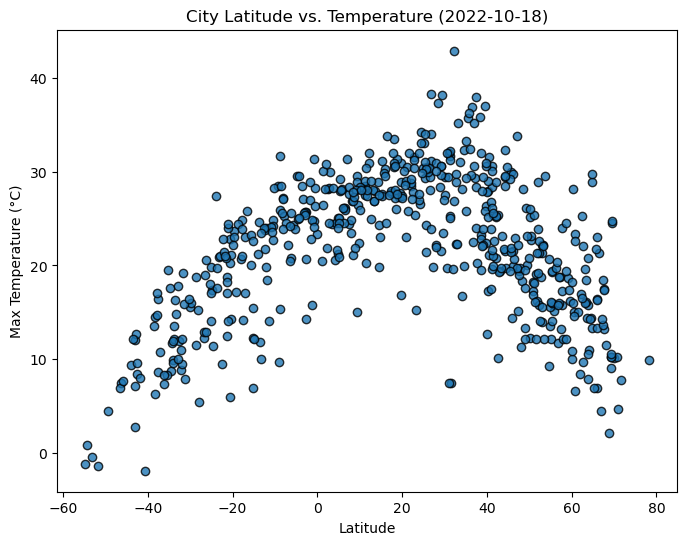

In [80]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

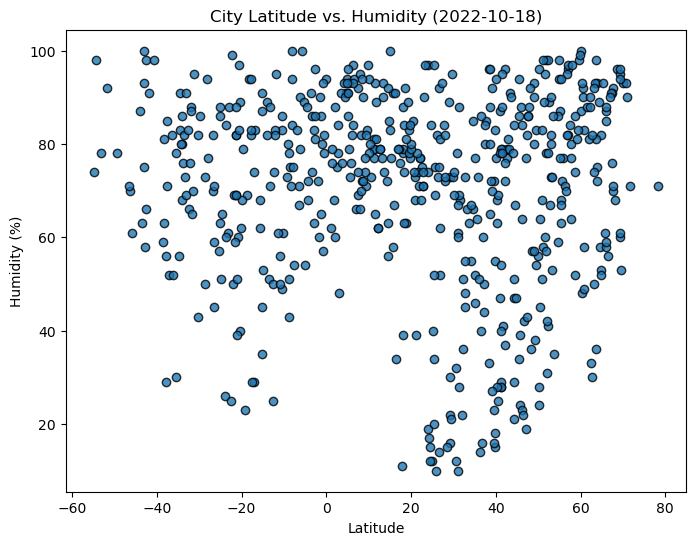

In [81]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

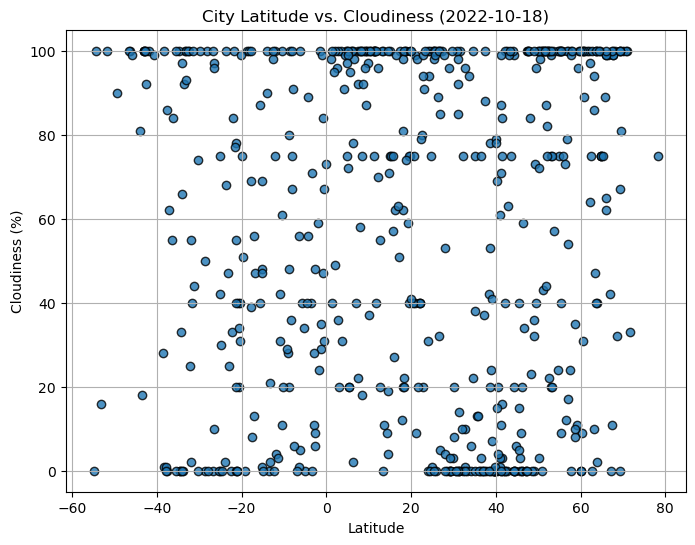

In [82]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.8)

# Set plot labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

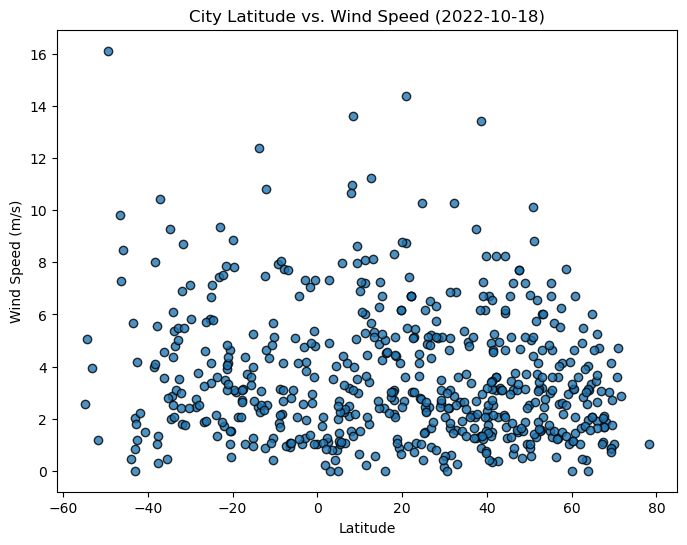

In [83]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [84]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create the regression line data
    regression_line = x_data * slope + intercept

In [85]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,11.48,68,100,1.86,RU,1690421566
2,at taraf,25.3628,49.7250,29.30,34,98,1.50,SA,1690421879
3,midelt,32.6852,-4.7451,22.24,45,1,1.58,MA,1690421880
4,at taj,24.2049,23.2857,26.51,17,94,2.80,LY,1690421634
7,bonthe,7.5264,-12.5050,24.38,92,92,2.09,SL,1690421880


In [86]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oranjemund,-28.5500,16.4333,11.46,73,0,2.77,NaN,1690421879
5,port-aux-francais,-49.3500,70.2167,4.44,78,90,16.12,TF,1690421558
6,bredasdorp,-34.5322,20.0403,8.78,91,0,1.98,ZA,1690421568
10,grytviken,-54.2811,-36.5092,0.87,98,100,5.05,GS,1690421556
13,ushuaia,-54.8000,-68.3000,-1.19,74,0,2.57,AR,1690421871


###  Temperature vs. Latitude Linear Regression Plot

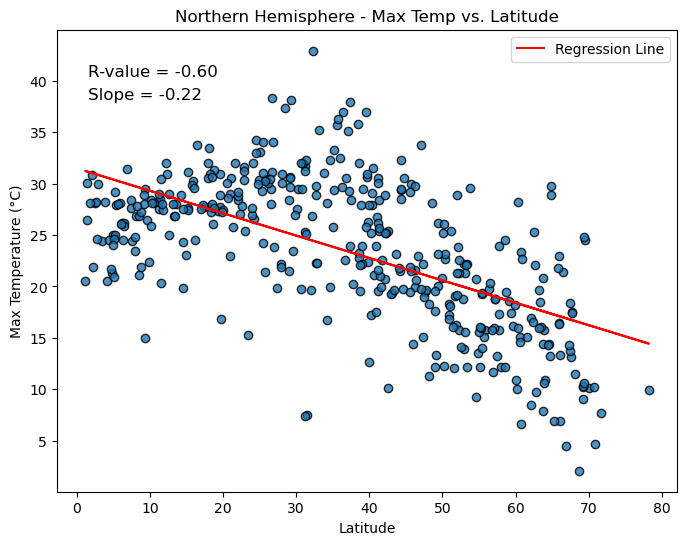

In [87]:
# Linear regression on Northern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create the regression line data
    regression_line = x_data * slope + intercept
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, edgecolor="black", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_data, regression_line, color="red", label="Regression Line")
    
    # Set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show R-value and Slope formula
    plt.annotate(f"R-value = {r_value:.2f}", (0.05, 0.9), xycoords='axes fraction', fontsize=12)
    plt.annotate(f"Slope = {slope:.2f}", (0.05, 0.85), xycoords='axes fraction', fontsize=12)
    
    # Show the legend
    plt.legend()
    
    # Show the plot
    plt.show()

# Filter the DataFrame to keep only northern hemisphere data
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Max Temp vs. Latitude
create_linear_regression_plot(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Northern Hemisphere - Max Temp vs. Latitude")

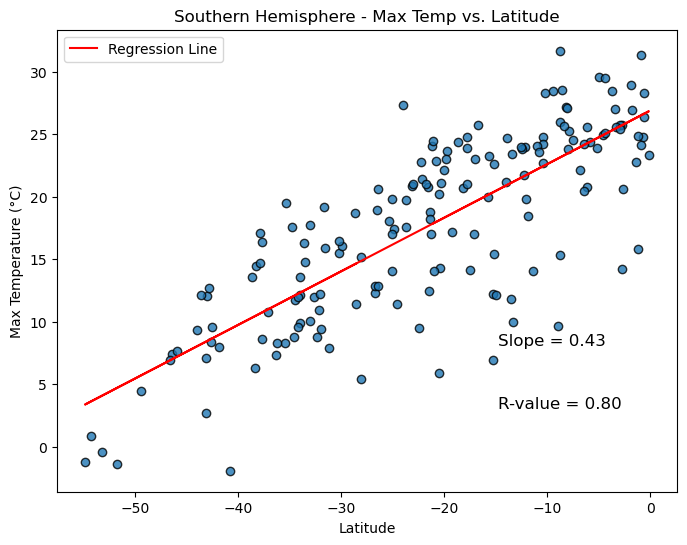

In [88]:
# Linear regression on Southern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create the regression line data
    regression_line = x_data * slope + intercept
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, edgecolor="black", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_data, regression_line, color="red", label="Regression Line")
    
    # Set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    
    # Show the legend
    plt.legend()
    
    # Annotate R-value and Slope formula
    plt.annotate(f"R-value = {r_value:.2f}", (min(x_data) + 40, min(y_data) + 5), fontsize=12)
    plt.annotate(f"Slope = {slope:.2f}", (min(x_data) + 40, min(y_data) + 10), fontsize=12)
    
    # Show the plot
    plt.show()

# Filter the DataFrame to keep only southern hemisphere data
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression on Max Temp vs. Latitude and display the R-value and Slope formula
create_linear_regression_plot(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere - Max Temp vs. Latitude")

**Discussion about the linear relationship:**
# The relationship is based around the equator. As latitude gets closer to the equator aka latitude 0, the max tempature will increase and inverse for as it distances from latitiude 0.

### Humidity vs. Latitude Linear Regression Plot

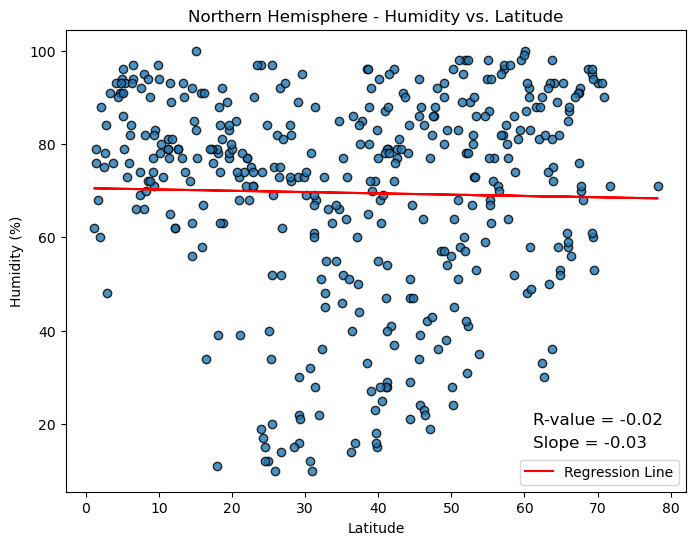

In [89]:
# Northern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create the regression line data
    regression_line = x_data * slope + intercept
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, edgecolor="black", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_data, regression_line, color="red", label="Regression Line")
    
    # Set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the legend
    plt.legend()
    
    # Annotate R-value and Slope formula
    plt.annotate(f"R-value = {r_value:.2f}", (min(x_data) + 60, max(y_data) - 80), fontsize=12)
    plt.annotate(f"Slope = {slope:.2f}", (min(x_data) + 60, max(y_data) - 85), fontsize=12)
    
    # Show the plot
    plt.show()

# Filter the DataFrame to keep only northern hemisphere data
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Humidity vs. Latitude and display the R-value and Slope formula
create_linear_regression_plot(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"], "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude")

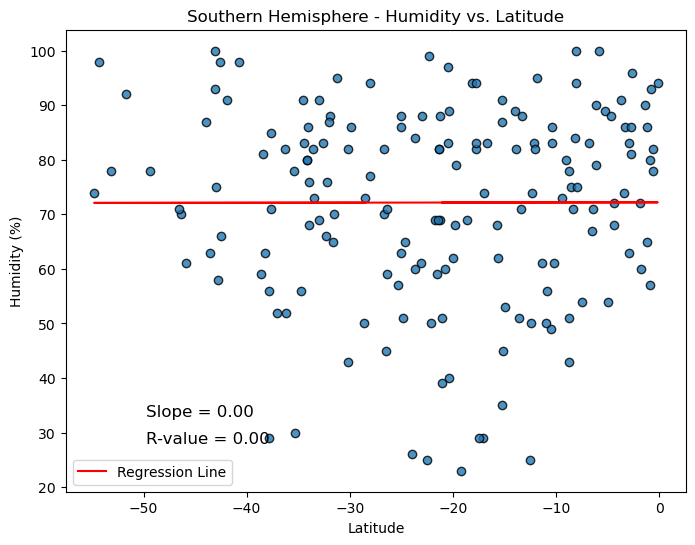

In [90]:
# Southern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create the regression line data
    regression_line = x_data * slope + intercept
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, edgecolor="black", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_data, regression_line, color="red", label="Regression Line")
    
    # Set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the legend
    plt.legend()
    
    # Annotate R-value and Slope formula
    plt.annotate(f"R-value = {r_value:.2f}", (min(x_data) + 5, min(y_data) + 5), fontsize=12)
    plt.annotate(f"Slope = {slope:.2f}", (min(x_data) + 5, min(y_data) + 10), fontsize=12)
    
    # Show the plot
    plt.show()

# Filter the DataFrame to keep only southern hemisphere data
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression on Humidity vs. Latitude and display the R-value and Slope formula
create_linear_regression_plot(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude")

**Discussion about the linear relationship:** 
# For this relationship it is again based around the equator. As latitude gets closer to the equator aka latitude 0, the humidity % decreases and inversely will increase as it distances from latitiude 0. This relationship is true but miniscule compared to the relationship of lattitude to tempature. 

### Cloudiness vs. Latitude Linear Regression Plot

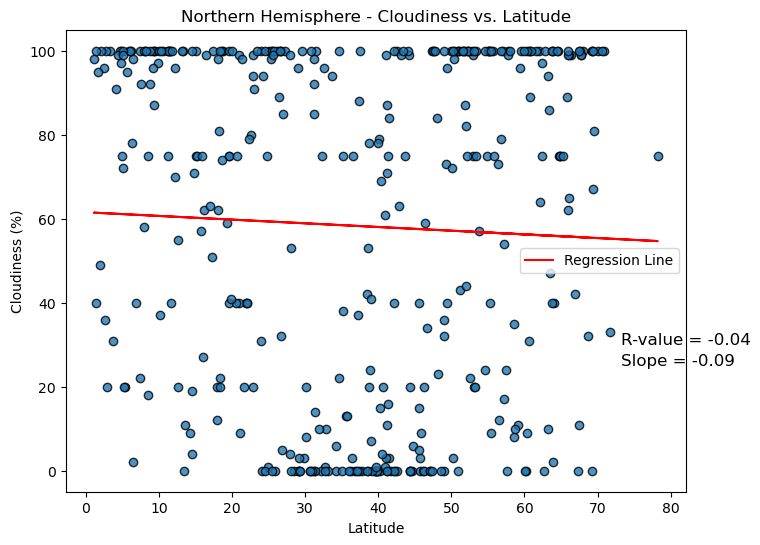

In [91]:
# Northern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create the regression line data
    regression_line = x_data * slope + intercept
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, edgecolor="black", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_data, regression_line, color="red", label="Regression Line")
    
    # Set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the legend
    plt.legend()
    
    # Annotate R-value and Slope formula
    plt.annotate(f"R-value = {r_value:.2f}", (min(x_data) + 72, max(y_data) - 70), fontsize=12)
    plt.annotate(f"Slope = {slope:.2f}", (min(x_data) + 72, max(y_data) - 75), fontsize=12)
    
    # Show the plot
    plt.show()

# Filter the DataFrame to keep only northern hemisphere data
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Cloudiness vs. Latitude and display the R-value and Slope formula
create_linear_regression_plot(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude")

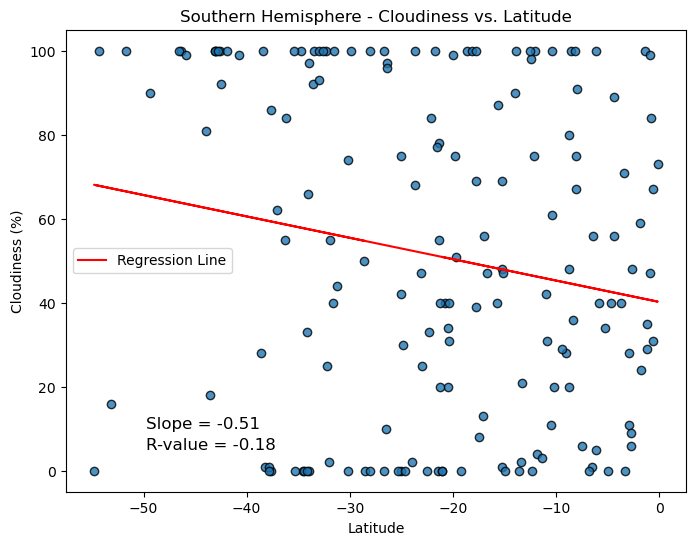

In [92]:
# Southern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create the regression line data
    regression_line = x_data * slope + intercept
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, edgecolor="black", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_data, regression_line, color="red", label="Regression Line")
    
    # Set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the legend
    plt.legend()
    
    # Annotate R-value and Slope formula
    plt.annotate(f"R-value = {r_value:.2f}", (min(x_data) + 5, min(y_data) + 5), fontsize=12)
    plt.annotate(f"Slope = {slope:.2f}", (min(x_data) + 5, min(y_data) + 10), fontsize=12)
    
    # Show the plot
    plt.show()

# Filter the DataFrame to keep only southern hemisphere data
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression on Cloudiness vs. Latitude and display the R-value and Slope formula
create_linear_regression_plot(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude")

**Discussion about the linear relationship:** 
# Based on the regression charts above this relationship is null. After running this chart multiple times I was able to conclude there is no relationship of cloudiness to lattitude. 

### Wind Speed vs. Latitude Linear Regression Plot

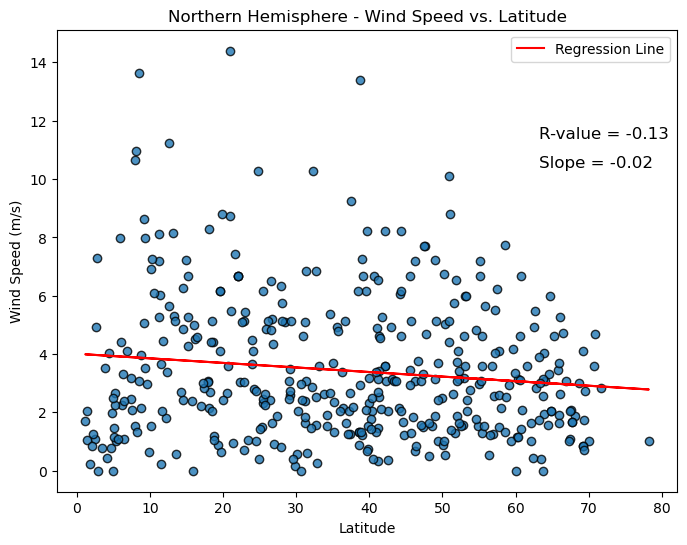

In [93]:
# Northern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create the regression line data
    regression_line = x_data * slope + intercept
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, edgecolor="black", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_data, regression_line, color="red", label="Regression Line")
    
    # Set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the legend
    plt.legend()
    
    # Annotate R-value and Slope formula
    plt.annotate(f"R-value = {r_value:.2f}", (min(x_data) + 62, max(y_data) - 3), fontsize=12)
    plt.annotate(f"Slope = {slope:.2f}", (min(x_data) + 62, max(y_data) - 4), fontsize=12)
    
    # Show the plot
    plt.show()

# Filter the DataFrame to keep only northern hemisphere data
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression on Wind Speed vs. Latitude and display the R-value and Slope formula
create_linear_regression_plot(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Northern Hemisphere - Wind Speed vs. Latitude")

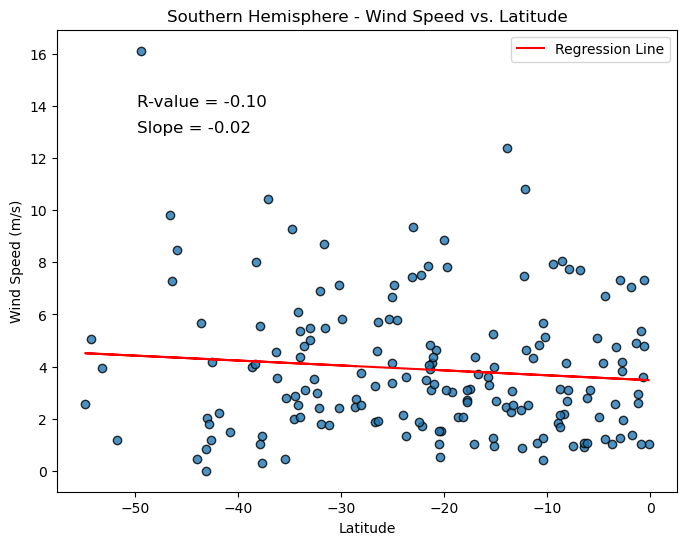

In [94]:
# Southern Hemisphere
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    
    # Create the regression line data
    regression_line = x_data * slope + intercept
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_data, y_data, edgecolor="black", alpha=0.8)
    
    # Plot the regression line
    plt.plot(x_data, regression_line, color="red", label="Regression Line")
    
    # Set plot labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show the legend
    plt.legend()
    
    # Annotate R-value and Slope formula
    plt.annotate(f"R-value = {r_value:.2f}", (min(x_data) + 5, min(y_data) + 14), fontsize=12)
    plt.annotate(f"Slope = {slope:.2f}", (min(x_data) + 5, min(y_data) + 13), fontsize=12)
    
    # Show the plot
    plt.show()

# Filter the DataFrame to keep only southern hemisphere data
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression on Wind Speed vs. Latitude and display the R-value and Slope formula
create_linear_regression_plot(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Southern Hemisphere - Wind Speed vs. Latitude")

**Discussion about the linear relationship:** 
# This relationship is the first to be linear across both hemispheres. This realtionship shows our wind speed decreases on average as lattitude gets lower (south) and increases on average as latitude gets higher (north).